# Ridge

In [1]:
import pandas as pd

df = pd.read_csv('./boston_train.csv')
df.rename(columns = {'medv' : 'PRICE'}, inplace = True)

target_y = df['PRICE']
data_X = df.drop(['PRICE'], axis=1, inplace=False)

In [2]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
import numpy as np

ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, data_X, target_y, scoring="neg_mean_squared_error", cv=5)

rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-16.419 -26.269 -34.91  -92.726 -58.468]
 5 folds 의 개별 RMSE scores :  [4.052 5.125 5.909 9.629 7.646]
 5 folds 의 평균 RMSE : 6.472 


In [4]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas :
    ridge = Ridge(alpha=alpha)
    neg_mse_scores = cross_val_score(ridge, data_X, target_y, scoring="neg_mean_squared_error", cv=5)
    
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha, avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 6.736 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 6.700 
alpha 1 일 때 5 folds 의 평균 RMSE : 6.613 
alpha 10 일 때 5 folds 의 평균 RMSE : 6.472 
alpha 100 일 때 5 folds 의 평균 RMSE : 6.207 


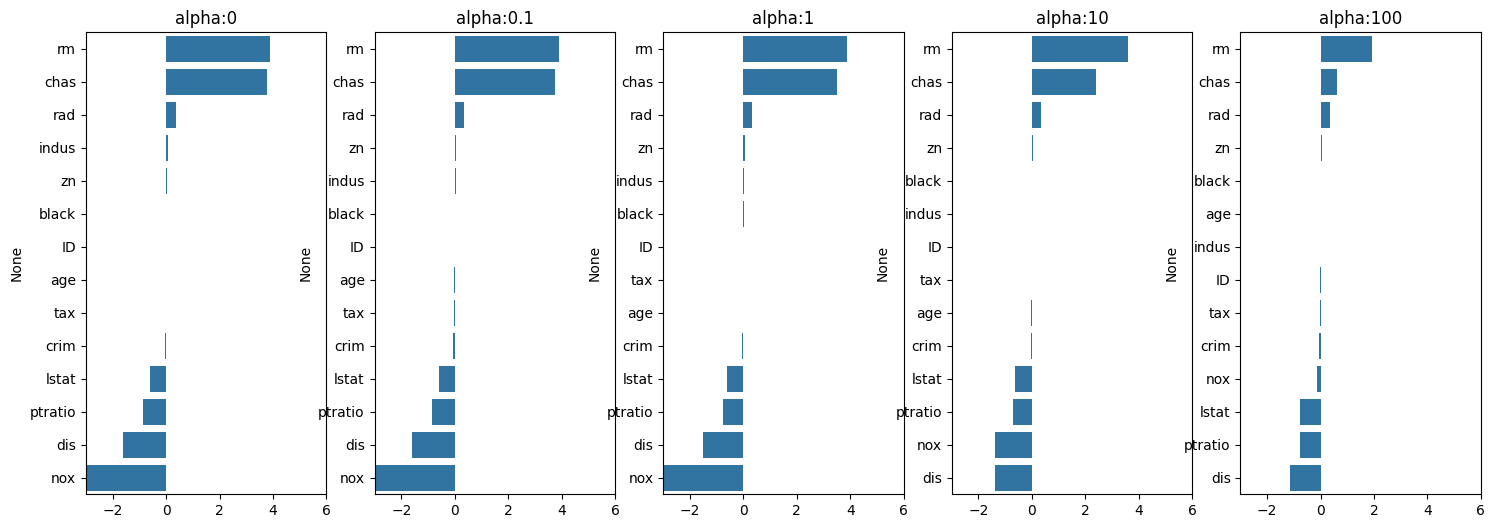

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig , axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(data_X, target_y)

    coeff = pd.Series(data=ridge.coef_ , index=data_X.columns)
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

plt.show()

In [6]:
ridge_alphas = [0 , 0.1 , 1 , 10 , 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
rm,3.879105,3.885374,3.895670,3.607230,1.934682
chas,3.780114,3.747765,3.523438,2.387089,0.617936
rad,0.361780,0.358010,0.342046,0.338078,0.368277
indus,0.053408,0.048051,0.024342,0.003393,0.001813
zn,0.049334,0.049629,0.051017,0.053450,0.057601
black,0.011885,0.011975,0.012379,0.012759,0.012001
ID,-0.004548,-0.004575,-0.004682,-0.004535,-0.002975
age,-0.009510,-0.010783,-0.016231,-0.017729,0.003517
tax,-0.011497,-0.011586,-0.012040,-0.013204,-0.015969
crim,-0.051706,-0.050663,-0.046170,-0.044030,-0.049125


# Lasso

In [7]:
from sklearn.linear_model import Lasso, ElasticNet

def get_linear_reg_eval(model_name, params=None, data_X_n=None, target_y_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    
    if verbose:
        print('####### ', model_name , '#######')
        
    for param in params:
        if model_name =='Ridge':
            model = Ridge(alpha=param)
        elif model_name =='Lasso':
            model = Lasso(alpha=param)
        elif model_name =='ElasticNet':
            model = ElasticNet(alpha=param, l1_ratio=0.7)

        neg_mse_scores = cross_val_score(model, data_X_n, target_y_n, scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        
        model.fit(data_X_n, target_y_n)
        if return_coeff:
            coeff = pd.Series(data=model.coef_, index=data_X_n.columns)
            
            colname='alpha:'+str(param)
            coeff_df[colname] = coeff
    
    return coeff_df

In [8]:
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]

coeff_lasso_df = get_linear_reg_eval('Lasso', params=lasso_alphas, data_X_n=data_X, target_y_n=target_y)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 6.676 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 6.694 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 6.792 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.874 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.289 


In [9]:
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.789422,3.703068,2.433588,0.777021,0.000000
chas,2.414972,1.889015,0.000000,0.000000,0.000000
rad,0.322616,0.323814,0.307863,0.275728,0.082661
zn,0.052265,0.052126,0.050765,0.049598,0.042806
black,0.012957,0.013000,0.012543,0.011432,0.009233
indus,0.000000,0.000000,0.000000,0.000000,-0.000000
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
ID,-0.004563,-0.004427,-0.002688,-0.000487,0.002727
tax,-0.012861,-0.013017,-0.013912,-0.014620,-0.010163
age,-0.019378,-0.017419,0.002391,0.026682,0.048054


# Elastic Net

In [10]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]

coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas, data_X_n=data_X, target_y_n=target_y)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 6.567 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 6.550 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 6.451 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.552 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 7.122 


In [11]:
sort_column = 'alpha:'+str(elastic_alphas[0])

coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
rm,3.587271,3.425364,1.888087,0.866993,0.000000
chas,2.033697,1.590357,0.000000,0.000000,0.000000
rad,0.331421,0.334408,0.333085,0.301208,0.158314
zn,0.053222,0.053467,0.054122,0.052047,0.041782
black,0.012895,0.012871,0.012148,0.011457,0.009952
indus,0.000000,0.000000,0.000000,0.000000,-0.000000
nox,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
ID,-0.004440,-0.004261,-0.002437,-0.000850,0.002149
tax,-0.013308,-0.013576,-0.015121,-0.015324,-0.012327
age,-0.017433,-0.014892,0.007211,0.024523,0.049523
